In [2]:
from metaqctrl.quantum.noise_models_v2 import *  

import matplotlib.pyplot as plt
import numpy as np

Sampled tasks:
Task 0: α=2.10, A=0.222, ωc=34103.42
Task 1: α=1.15, A=0.513, ωc=39742.56
Task 2: α=2.20, A=0.880, ωc=71014.77
Task 3: α=2.51, A=0.462, ωc=92003.86
Task 4: α=2.35, A=0.906, ωc=63589.67


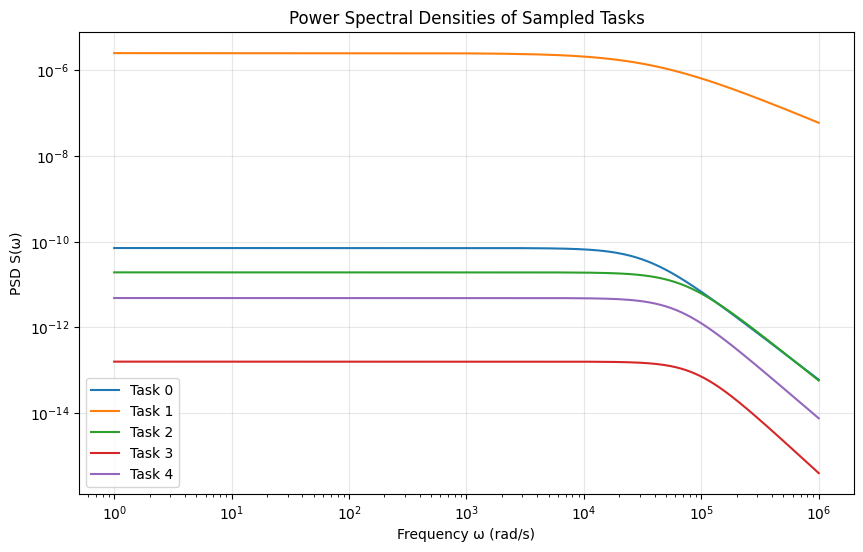

In [8]:
task_dist = TaskDistribution(
dist_type='uniform', ranges={
            'alpha': (1, 3.0),
            'A': (0.05, 1),
            'omega_c': (10,1e5) } ) 

rng = np.random.default_rng()
tasks = task_dist.sample(5, rng)

print("Sampled tasks:")
for i, task in enumerate(tasks):
    print(f"Task {i}: α={task.alpha:.2f}, A={task.A:.3f}, ωc={task.omega_c:.2f}")
    
psd_model = NoisePSDModel(model_type='one_over_f')
omega = np.linspace(1, 1e6, 1000)

plt.figure(figsize=(10, 6))
for i, task in enumerate(tasks):
    S = psd_model.psd(omega, task)
    plt.loglog(omega, S, label=f'Task {i}')
plt.xlabel('Frequency ω (rad/s)')
plt.ylabel('PSD S(ω)')
plt.title('Power Spectral Densities of Sampled Tasks')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
omega_integration_range = (0,1e6)
n_integration_points = int(1e4) 
psd_model = NoisePSDModel(model_type='one_over_f')
n_segments = 20
T = 1 
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
sigma_m =  0.5*(sigma_x-1j*sigma_y) 

# Noise basis operators
basis_operators = [sigma_m , sigma_z]

omega_max = n_integration_points/ T
omega_sample = np.linspace(0, omega_max, 10)
psd_to_lindblad = PSDToLindblad(
    basis_operators=basis_operators,
    sampling_freqs=omega_sample,
    psd_model=psd_model,
    n_integration_points= n_integration_points,
    omega_integration_range = omega_integration_range 
)
for i in range(len(tasks)): 
    task_i = tasks[i]
    rate = psd_to_lindblad.get_effective_rates(task_i)
    print(rate)
    

TypeError: PSDToLindblad.__init__() got an unexpected keyword argument 'basis_operators'